## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions
#df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_customTFs_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')
#df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')
#df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8_from_customTFs/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

# For FIS based interactions
#df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_customTFs_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')
#df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')
df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8_from_customTFs/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [3]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [4]:
df.shape

(2028, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [5]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [6]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [7]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate, single_TF=True)

In [8]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
0,filter1<-->filter2,199,M0942_1.02,0.00523,M0404_1.02,0.024599,453.0,415.0,515.0,1157.0,1.224326e-05,2.157641e-05,IRX4,ZNF202
1,filter1<-->filter5,202,M0942_1.02,0.00523,M0424_1.02,0.017134,50.0,684.0,731.0,2160.0,2.051095e-05,3.472883e-05,IRX4,SNAI3
3,filter1<-->filter14,211,M0942_1.02,0.00523,M1110_1.02,0.034934,405.0,787.0,328.0,1307.0,8.930079e-12,5.528620e-11,IRX4,HHEX
4,filter1<-->filter16,213,M0942_1.02,0.00523,M0891_1.02,0.037698,367.0,346.0,743.0,2236.0,6.889216e-11,3.493766e-10,IRX4,TLX2
5,filter1<-->filter17,214,M0942_1.02,0.00523,M5349_1.02,0.042940,352.0,96.0,406.0,703.0,1.611240e-03,2.026269e-03,IRX4,DUXA


In [9]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [10]:
df = df[df['TF1']!=df['TF2']]

In [11]:
df.shape

(1916, 15)

In [12]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [13]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [14]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter1<-->filter2,199,M0942_1.02,0.00523,M0404_1.02,0.024599,453.0,415.0,515.0,1157.0,1.224326e-05,2.157641e-05,IRX4,ZNF202,IRX4$\longleftrightarrow$ZNF202
1,filter1<-->filter5,202,M0942_1.02,0.00523,M0424_1.02,0.017134,50.0,684.0,731.0,2160.0,2.051095e-05,3.472883e-05,IRX4,SNAI3,IRX4$\longleftrightarrow$SNAI3
2,filter1<-->filter14,211,M0942_1.02,0.00523,M1110_1.02,0.034934,405.0,787.0,328.0,1307.0,8.930079e-12,5.528620e-11,IRX4,HHEX,IRX4$\longleftrightarrow$HHEX
3,filter1<-->filter16,213,M0942_1.02,0.00523,M0891_1.02,0.037698,367.0,346.0,743.0,2236.0,6.889216e-11,3.493766e-10,IRX4,TLX2,IRX4$\longleftrightarrow$TLX2
4,filter1<-->filter17,214,M0942_1.02,0.00523,M5349_1.02,0.042940,352.0,96.0,406.0,703.0,1.611240e-03,2.026269e-03,IRX4,DUXA,IRX4$\longleftrightarrow$DUXA


In [15]:
df.shape

(1916, 15)

## Most Frequent TF Family Interactions

In [16]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [17]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [18]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [19]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1<-->filter2,199,M0942_1.02,0.00523,M0404_1.02,0.024599,453.0,415.0,515.0,1157.0,1.224326e-05,2.157641e-05,IRX4,ZNF202,IRX4$\longleftrightarrow$ZNF202,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
1,filter1<-->filter5,202,M0942_1.02,0.00523,M0424_1.02,0.017134,50.0,684.0,731.0,2160.0,2.051095e-05,3.472883e-05,IRX4,SNAI3,IRX4$\longleftrightarrow$SNAI3,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
2,filter1<-->filter14,211,M0942_1.02,0.00523,M1110_1.02,0.034934,405.0,787.0,328.0,1307.0,8.930079e-12,5.528620e-11,IRX4,HHEX,IRX4$\longleftrightarrow$HHEX,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain
3,filter1<-->filter16,213,M0942_1.02,0.00523,M0891_1.02,0.037698,367.0,346.0,743.0,2236.0,6.889216e-11,3.493766e-10,IRX4,TLX2,IRX4$\longleftrightarrow$TLX2,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain
4,filter1<-->filter17,214,M0942_1.02,0.00523,M5349_1.02,0.042940,352.0,96.0,406.0,703.0,1.611240e-03,2.026269e-03,IRX4,DUXA,IRX4$\longleftrightarrow$DUXA,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain


### Distribution of individual TF or TF family interactions

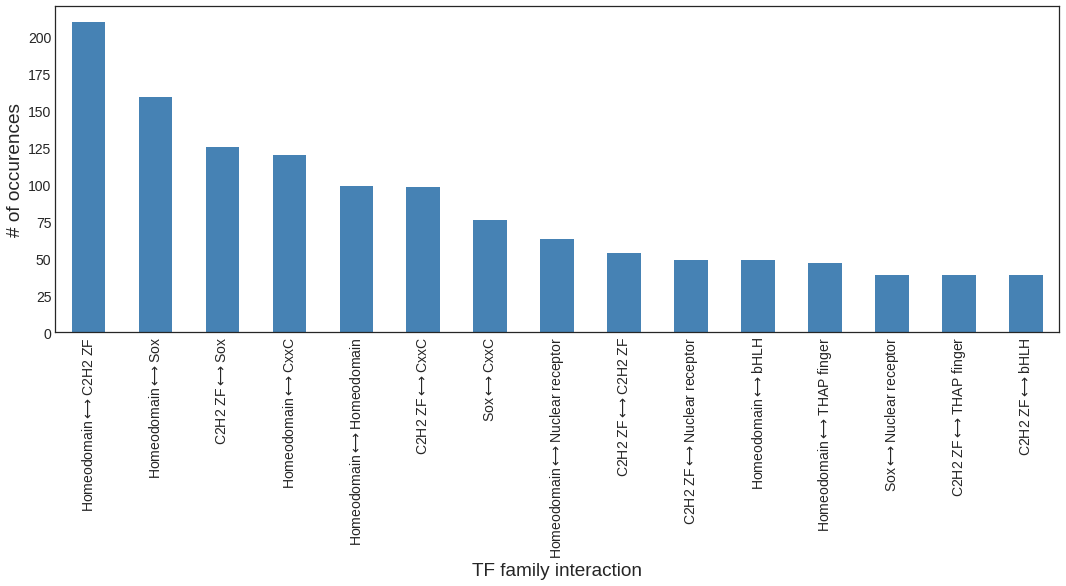

In [20]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

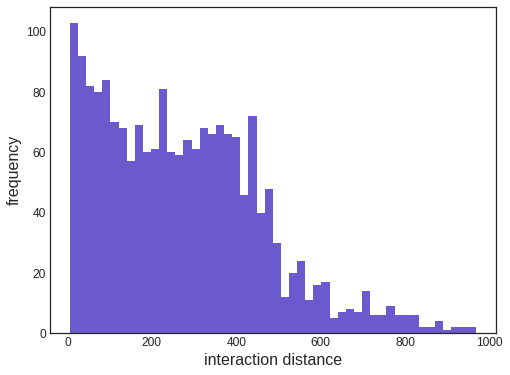

In [21]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [22]:
df['mean_distance'].mean(), df['mean_distance'].median()

(273.6920668058455, 252.0)

### Most frequent interactions and their respective interaction distances

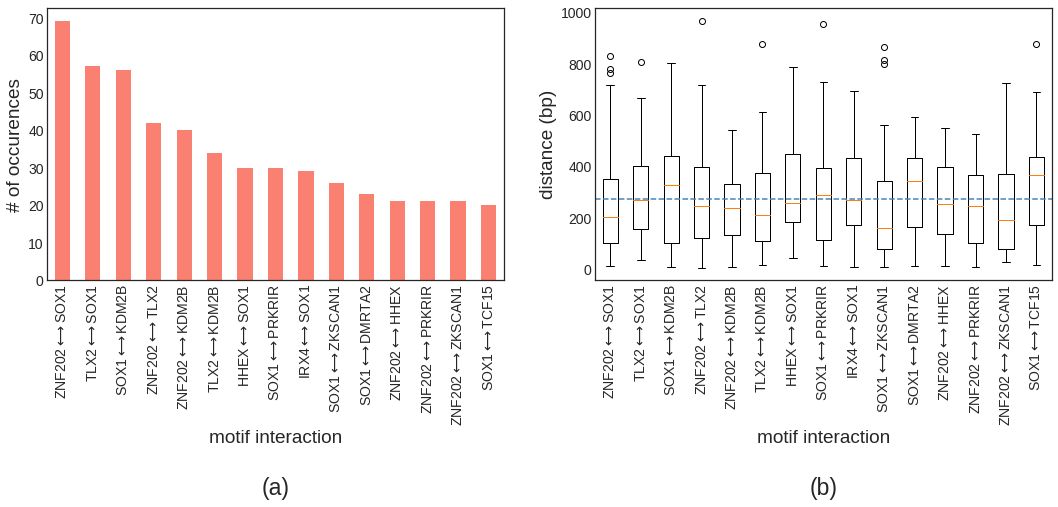

In [23]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True)

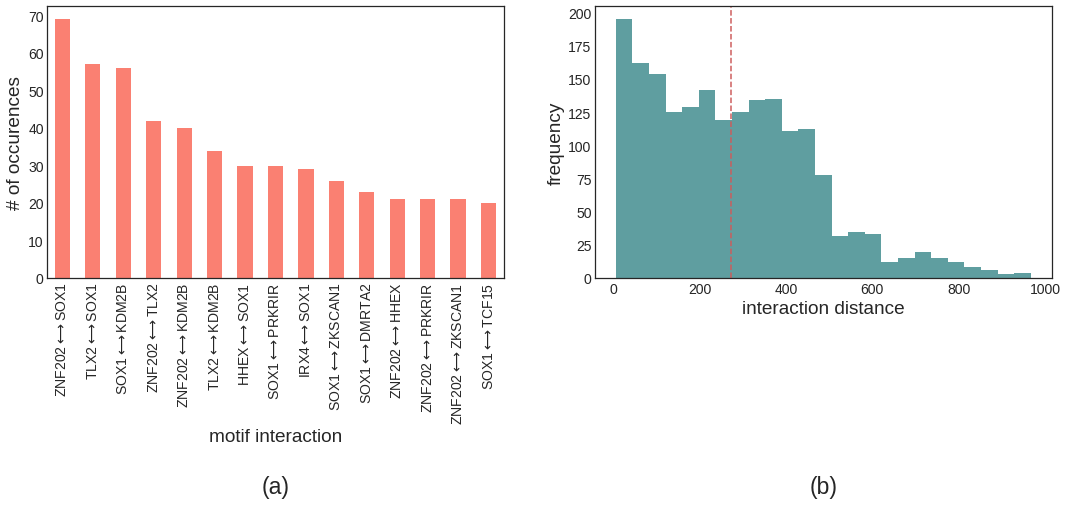

In [24]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True)

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [25]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [26]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [27]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [28]:
df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
1351,RARB$\longleftrightarrow$RARG,Nuclear receptor,Nuclear receptor,3.626803e-14
1522,DNMT1$\longleftrightarrow$PAX2,CxxC,"Homeodomain,Paired box",2.536425e-10


### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [29]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/Protein-interactions/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [30]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [31]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [32]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [33]:
df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
753,KDM2B$\longleftrightarrow$DNMT1,CxxC,CxxC,8.101382e-19
1351,RARB$\longleftrightarrow$RARG,Nuclear receptor,Nuclear receptor,3.626803e-14
500,HHEX$\longleftrightarrow$KDM2B,Homeodomain,CxxC,3.573848e-10
490,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain,2.749824e-09
1141,IRX4$\longleftrightarrow$RXRB,Homeodomain,Nuclear receptor,6.301537e-06
1247,DNMT1$\longleftrightarrow$RXRB,CxxC,Nuclear receptor,9.713786e-06
